In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/log2.csv')

df.head()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,anomaly,threat_type,timestamp
0,57222,53,54587,53,allow,177,94,83,2,30,1,1,1,Normal,2025-07-21 00:00:00
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9,1,RDP Access Attempt,2025-07-21 00:00:01
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1,1,Normal,2025-07-21 00:00:02
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7,1,RDP Access Attempt,2025-07-21 00:00:03
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18,1,Normal,2025-07-21 00:00:04


In [34]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
 12  anomaly               65532 non-null  int64 
 13  threat_type           65532 non-null  object
 14  timestamp             65532 non-null  object
dtypes: int64(12), object(3)
memory usage

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,anomaly
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505,0.900842
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271,0.434150
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,-1.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,1.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000,1.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000,1.000000


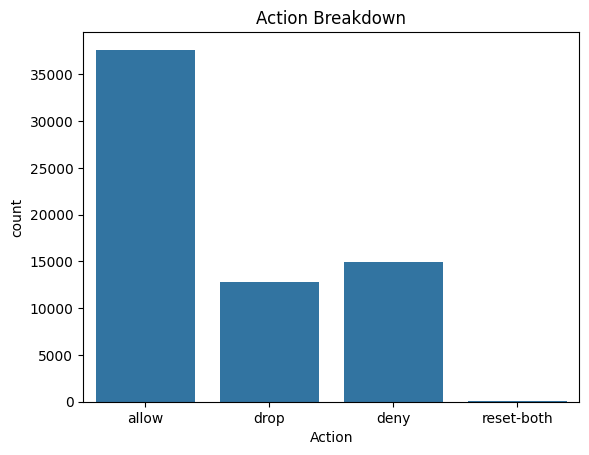

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Action')
plt.title("Action Breakdown")
plt.show()


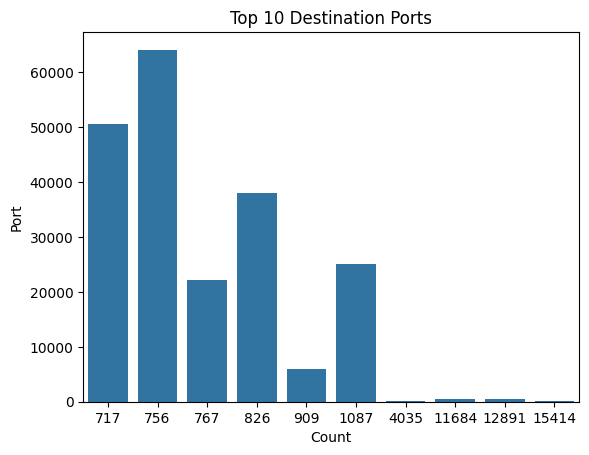

In [36]:
top_ports = df['Destination Port'].value_counts().head(10)

sns.barplot(x=top_ports.values, y=top_ports.index)
plt.title("Top 10 Destination Ports")
plt.xlabel("Count")
plt.ylabel("Port")
plt.show()


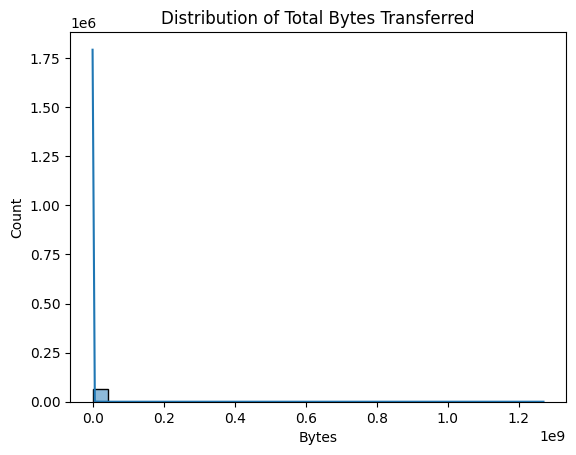

In [37]:
sns.histplot(df['Bytes'], bins=30, kde=True)
plt.title("Distribution of Total Bytes Transferred")
plt.xlabel("Bytes")
plt.show()


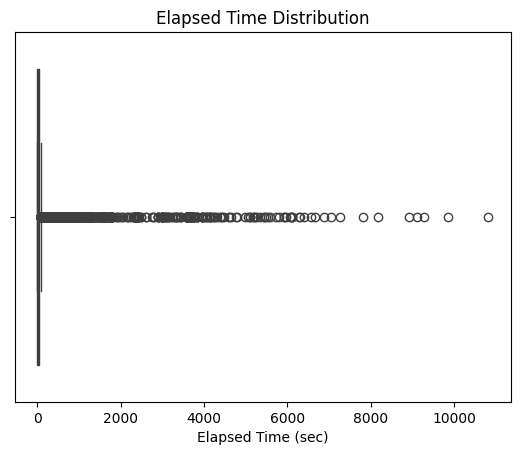

In [38]:
sns.boxplot(x=df['Elapsed Time (sec)'])
plt.title("Elapsed Time Distribution")
plt.show()


In [39]:
# Sessions longer than 1000 sec
df[df['Elapsed Time (sec)'] > 1000]

# Bytes sent over 10,000
df[df['Bytes'] > 10000]


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,anomaly,threat_type,timestamp
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18,1,Normal,2025-07-21 00:00:04
15,36887,443,63451,443,allow,10922,2532,8390,27,28,13,14,1,Normal,2025-07-21 00:00:15
20,48488,443,26104,443,allow,12993,3240,9753,36,24,18,18,1,Normal,2025-07-21 00:00:20
28,52192,443,41129,443,allow,13948,1150,12798,29,15,14,15,1,Normal,2025-07-21 00:00:28
29,57886,443,10717,443,allow,33667,25477,8190,60,33,34,26,-1,Uncategorized Anomaly,2025-07-21 00:00:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65302,50946,80,36199,80,allow,5870176,83236,5786940,5053,78,1161,3892,-1,Large Data Exfiltration,2025-07-21 18:08:22
65481,51000,443,31109,443,allow,41713,34380,7333,67,333,38,29,-1,Uncategorized Anomaly,2025-07-21 18:11:21
65487,61308,443,22375,443,allow,44341,5858,38483,102,195,42,60,-1,Uncategorized Anomaly,2025-07-21 18:11:27
65499,50343,80,49722,80,allow,22233,10123,12110,37,28,16,21,1,Normal,2025-07-21 18:11:39


In [40]:
features = df[[
    'Bytes',
    'Bytes Sent',
    'Bytes Received',
    'Packets',
    'Elapsed Time (sec)',
    'pkts_sent',
    'pkts_received'
]]


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [42]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(X_scaled)


In [43]:
df['anomaly'].value_counts()


anomaly
 1    62283
-1     3249
Name: count, dtype: int64

In [44]:
def classify_threat(row):
    if row['Destination Port'] == 3389:
        return 'RDP Access Attempt'
    elif row['Bytes'] > 50000:
        return 'Large Data Exfiltration'
    elif row['pkts_received'] > 100:
        return 'Unusual Inbound Traffic'
    elif row['anomaly'] == -1:
        return 'Uncategorized Anomaly'
    else:
        return 'Normal'

df['threat_type'] = df.apply(classify_threat, axis=1)


In [45]:
import numpy as np
import pandas as pd

# Spread over 24 hours
df['timestamp'] = pd.date_range(
    start='2025-07-21 00:00:00',
    periods=len(df),
    freq=f'{int(86400 / len(df))}S'  # Evenly distribute over 24h
)


/var/folders/f1/h0qgx04j6kq430yq1r5_83sc0000gn/T/ipykernel_53206/2618439126.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(


In [46]:
df.to_csv('../data/log2.csv', index=False)


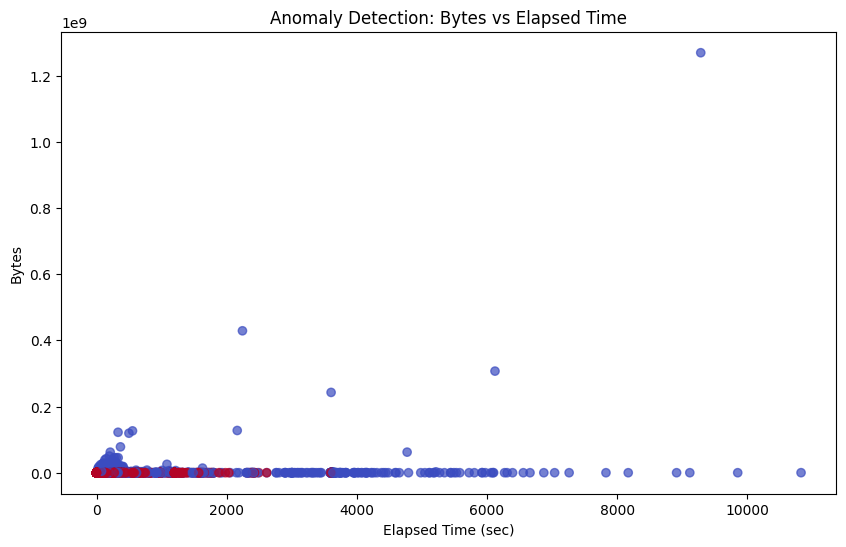

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Elapsed Time (sec)'], df['Bytes'], 
            c=df['anomaly'], cmap='coolwarm', alpha=0.7)
plt.title('Anomaly Detection: Bytes vs Elapsed Time')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Bytes')
plt.show()


In [48]:
anomalies = df[df['anomaly'] == -1]
anomalies.head(10)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,anomaly,threat_type,timestamp
29,57886,443,10717,443,allow,33667,25477,8190,60,33,34,26,-1,Uncategorized Anomaly,2025-07-21 00:00:29
34,34529,443,30445,443,allow,62652,30891,31761,158,381,67,91,-1,Large Data Exfiltration,2025-07-21 00:00:34
37,59347,80,59347,80,allow,108790,4633,104157,192,15,66,126,-1,Large Data Exfiltration,2025-07-21 00:00:37
50,63842,45682,31353,45682,allow,4687209,3850148,837061,4974,107,3004,1970,-1,Large Data Exfiltration,2025-07-21 00:00:50
58,60339,80,1887,80,allow,35136,7862,27274,53,124,26,27,-1,Uncategorized Anomaly,2025-07-21 00:00:58
63,52103,80,61932,80,allow,68083,5515,62568,90,38,40,50,-1,Large Data Exfiltration,2025-07-21 00:01:03
72,50685,80,6959,80,allow,63891,26626,37265,86,34,39,47,-1,Large Data Exfiltration,2025-07-21 00:01:12
88,46265,443,19534,443,allow,173828,9311,164517,245,448,118,127,-1,Large Data Exfiltration,2025-07-21 00:01:28
93,52715,443,38027,443,allow,164840,5975,158865,179,122,61,118,-1,Large Data Exfiltration,2025-07-21 00:01:33
101,61396,443,45721,443,allow,550484,8433,542051,541,246,99,442,-1,Large Data Exfiltration,2025-07-21 00:01:41
